# Titanic Train Data Analysis and Model prepareing

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


The dataset contains 891 no of rows and 12 columns. 

In [3]:
# Name of Each columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The titanic dataset contains 891 rows inedexed from 0 to 890. there are 12 column present. in the count of not null data we can notice that in the age column there are 714 not null value present in the cabin there are 204 not null value present and in the embarked column there are 889 not null value present. Data type of each column shows us the data type of each columns. there are 2 float data, 5 integer data and 5 object data present. hare integer data type may belongs to categorical data to confirm that we have to go through value counts method and nunique methods.

In [5]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
#value counts
for i in df.columns:
    print(df[i].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

Observations:
1. PassengerID column contains all unique values.
2. In survived column there are 2 data 0 and 1 hence it is categorical column. 0 represents not survived and 1 represents survived. 549 passengers have not survived and 342 passengers have survived.
3. There are 3 kind of passenger class namely 1st, 2nd and 3rd class hence it is categorical column. 1st class passenger =216, 2nd class passengers= 184 and 3rd class passengers=491.
4. in Sex column there are male and female passengers present. hence it is categorical column. no of male passenger= 577, no of female passenger=314.
5. in the Embarked colulm there are 3 kind namely S, C, and Q. hance it is categorical column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


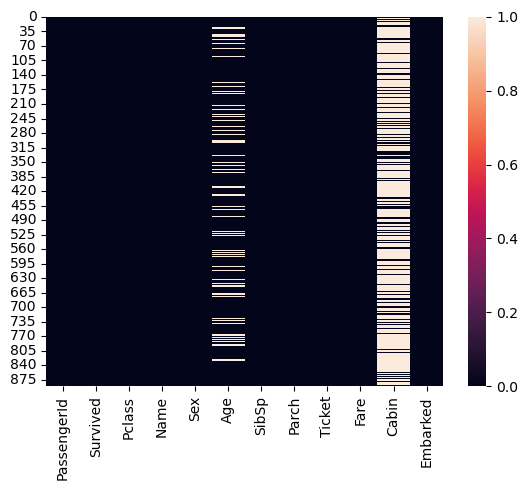

In [7]:
# Checking for Null values
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

In the Age column there are nullvalues presents that can be replaced by their mean value. but in the cabin we can see that it is a object data type column hence we cannot replace it by anything. latter we need to drop that column. in the Embarked column there are 2 missing data. we can replace with mode value.

In [8]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Age"].isnull().sum()

0

In [9]:
# Droping out Cabin column. as it has only the cabin that assigned to passenger.
df.drop("Cabin", axis=1, inplace=True)

In [10]:
# Replacing categorical data with its mode value.
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


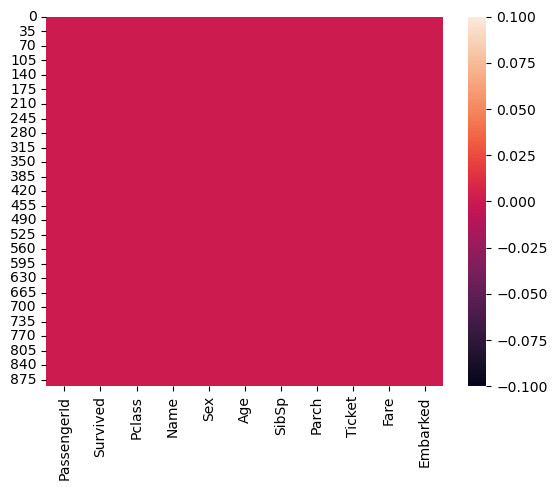

In [11]:
# checking null value present in the dataset.
print(df.isnull().sum())
sns.heatmap(df.isnull())
plt.show()

In [12]:
# checking for descriptive value
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


observation: 
1. counts of all numerical columns is same i.e. there is no missing data.
2. in Fare column, mean>median. i.e. there may have right skewed data present. and diff between 75th percentile and max value is  very high as compared to 50th and 75th data. hence there may have outliers. 
3.  in Age column thare may have outliers.

## Data Visualisation

#### Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64


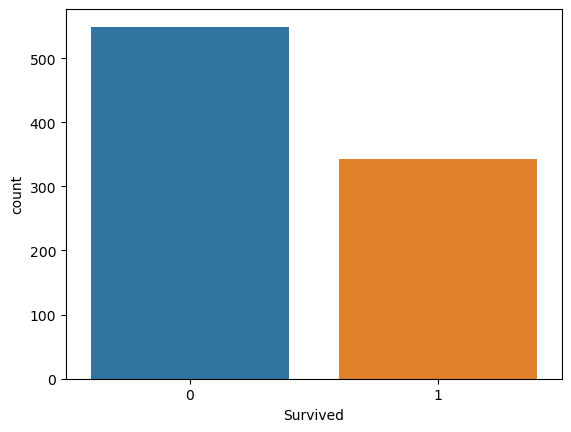

In [13]:
# checking for survived person
print(df.Survived.value_counts())
sns.countplot(data= df,x='Survived')
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


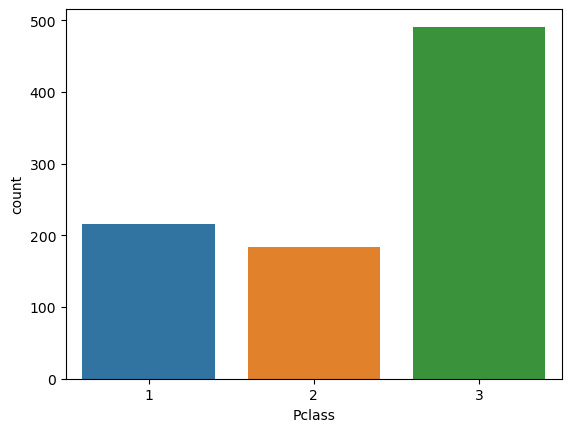

In [14]:
# Checking for Pclass
print(df.Pclass.value_counts())
sns.countplot(data=df, x='Pclass')
plt.show()

male      577
female    314
Name: Sex, dtype: int64


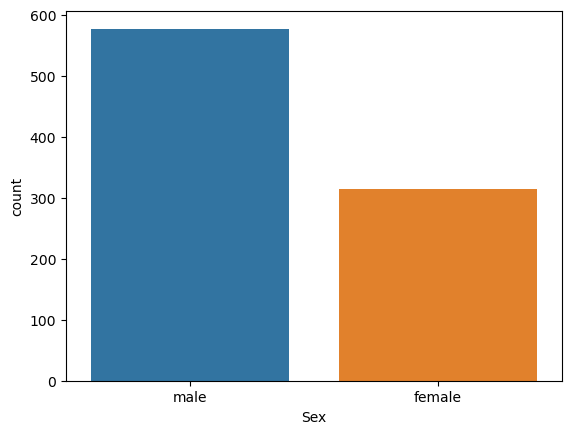

In [15]:
# Checking Sex Column
print(df.Sex.value_counts())
sns.countplot(data=df, x='Sex')
plt.show()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


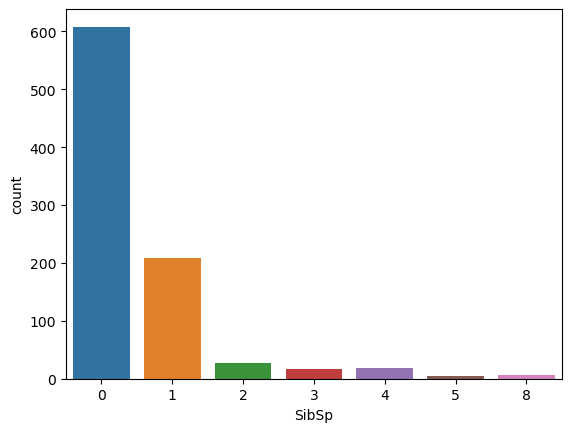

In [16]:
# Checking for SibSp
print(df.SibSp.value_counts())
sns.countplot(data=df, x='SibSp')
plt.show()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


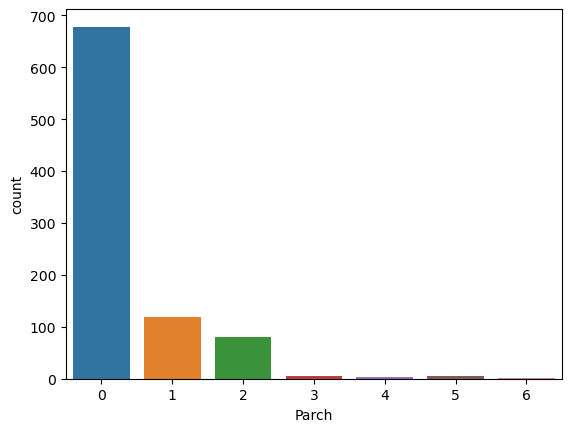

In [17]:
# Checking Parch Column
print(df.Parch.value_counts())
sns.countplot(data=df, x='Parch')
plt.show()

S    646
C    168
Q     77
Name: Embarked, dtype: int64


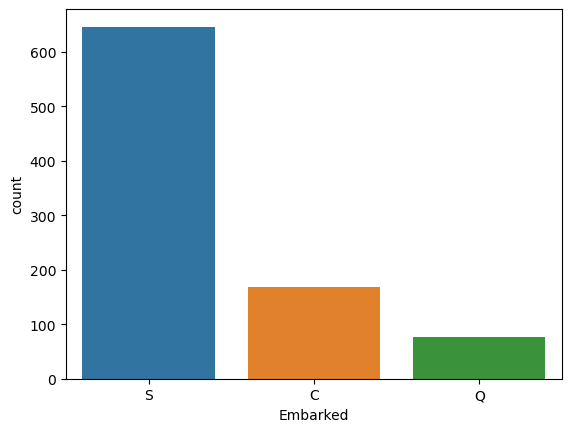

In [18]:
# Checking Embarked Column
print(df.Embarked.value_counts())
sns.countplot(data=df, x='Embarked')
plt.show()

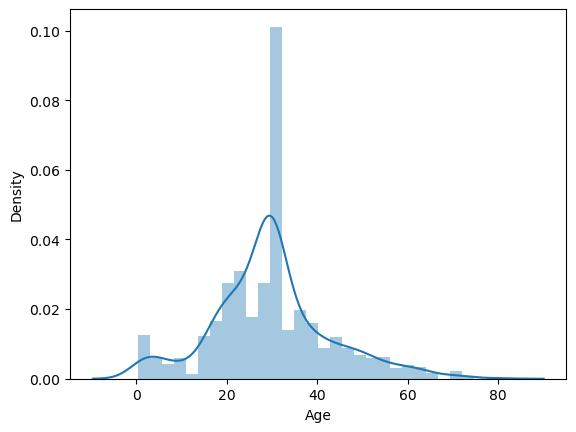

In [19]:
# Checking for Age column
sns.distplot(df['Age'], kde=True)
plt.show()

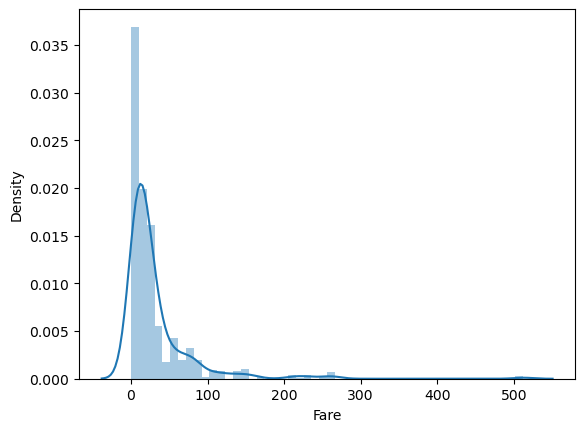

In [20]:
# Checking for Fare Column
sns.distplot(df['Fare'], kde=True)
plt.show()

### Bivariate Analtsis

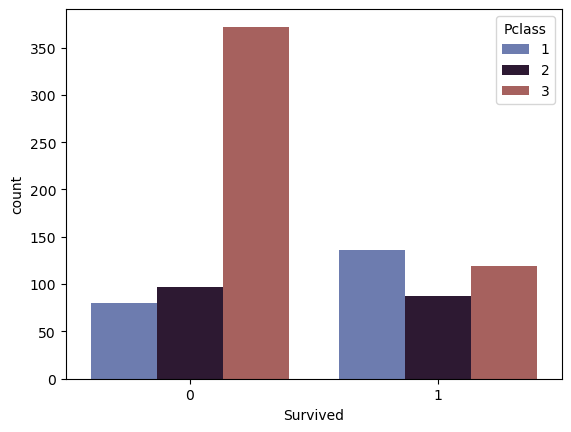

In [21]:
# Checking for Survived person based on Pclass
sns.countplot(data=df, x='Survived', hue='Pclass', palette='twilight')
plt.show()

Obserbation: mostly person thoese who not survived are belongs to 3rd class passenger.

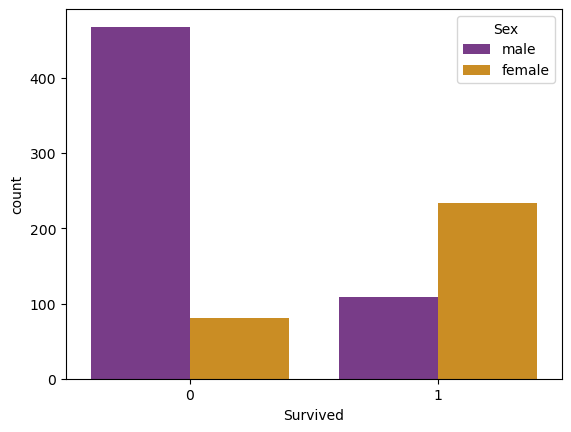

In [22]:
# Checking for Survived data based on Sex
sns.countplot(data=df, x='Survived', hue='Sex', palette='CMRmap')
plt.show()

Observation: Persons those who not survived are mostly male. and Those who survived mostly female.

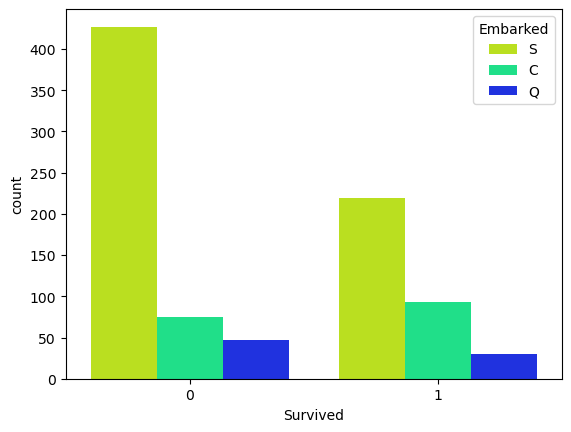

In [23]:
# Checking for Survived based on Embarked
sns.countplot(data=df, x='Survived', hue='Embarked', palette='gist_rainbow')
plt.show()

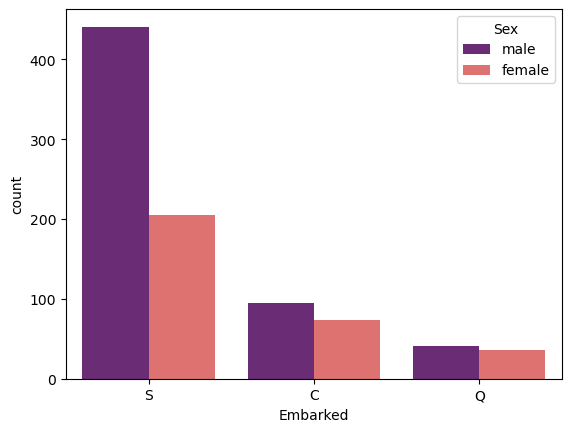

In [24]:
sns.countplot(data=df, x='Embarked', hue='Sex', palette='magma')
plt.show()

Persons Those who from Southampton are mostly not Survived.and those who survived they are also from Southampton. which means most of the passengers are from Southampton.

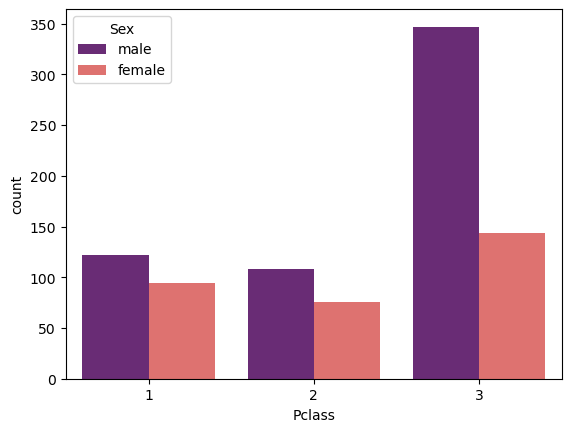

In [25]:
sns.countplot(data=df, x= 'Pclass', hue='Sex', palette='magma')
plt.show()

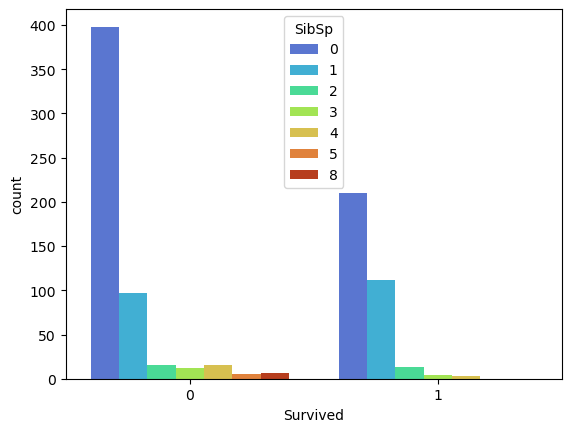

In [26]:
sns.countplot(data=df, x='Survived', hue='SibSp', palette='turbo')
plt.show()

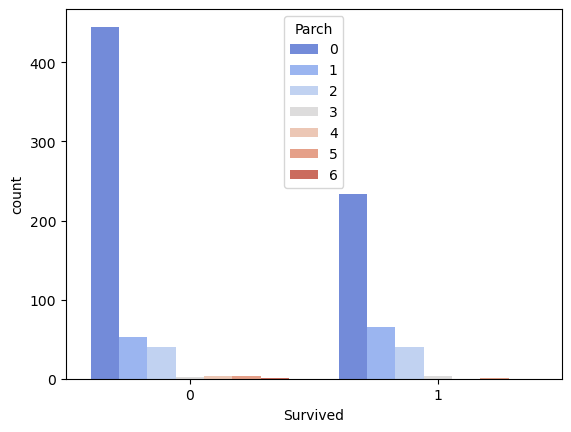

In [27]:
sns.countplot(data=df, x='Survived', hue='Parch', palette='coolwarm')
plt.show()

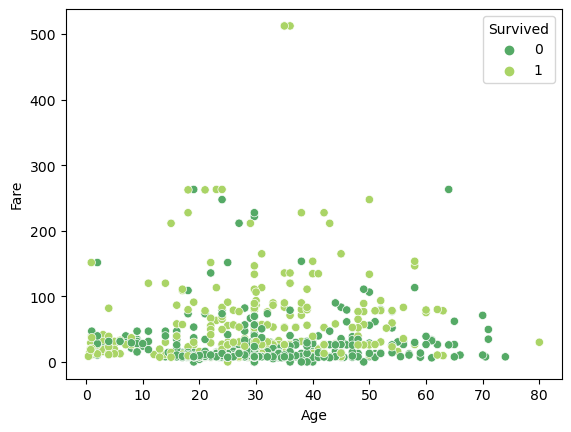

In [28]:
sns.scatterplot(data=df, x='Age', y='Fare',hue='Survived', palette='summer')
plt.show()

Nothing can be concluded based on Age as for every age there their survived and not survived data is present. but from fare column mostly those who pay less they have not been survived.

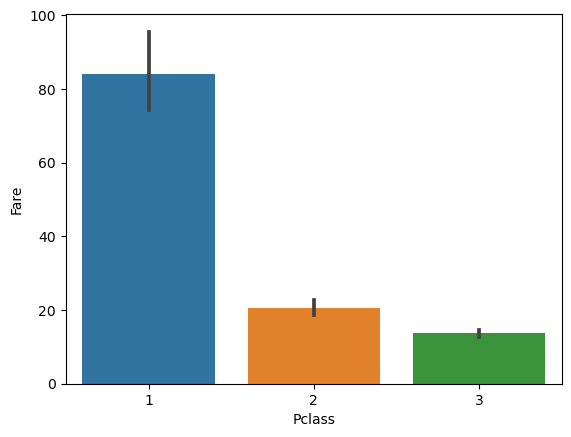

In [29]:
# fare based on class
sns.barplot(data=df, x='Pclass', y='Fare')
plt.show()

passenger those who are in 1st class they are paying the maximum amount.

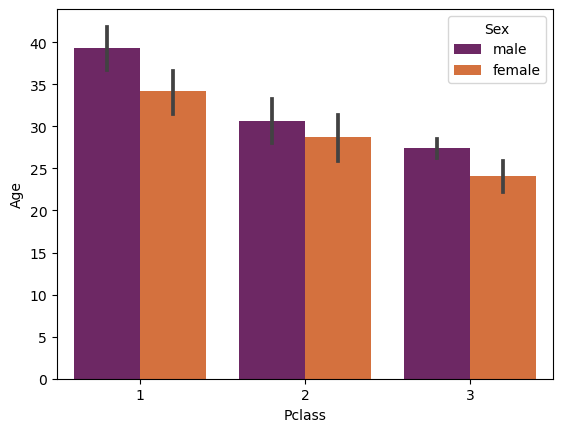

In [30]:
sns.barplot(data=df, x='Pclass', y='Age',hue='Sex', palette= 'inferno')
plt.show()

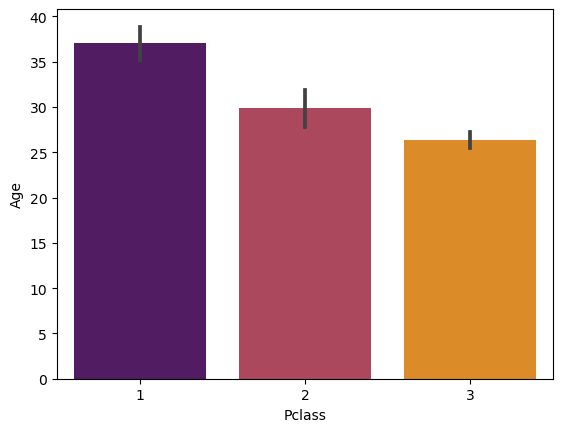

In [31]:
sns.barplot(data=df, x='Pclass', y='Age', palette= 'inferno')
plt.show()

Most of the candidate those who are aged they have been booked 1st class ticket. And those who are yonger person they have been booked 3rd class ticket.

### Multivariate Analysis

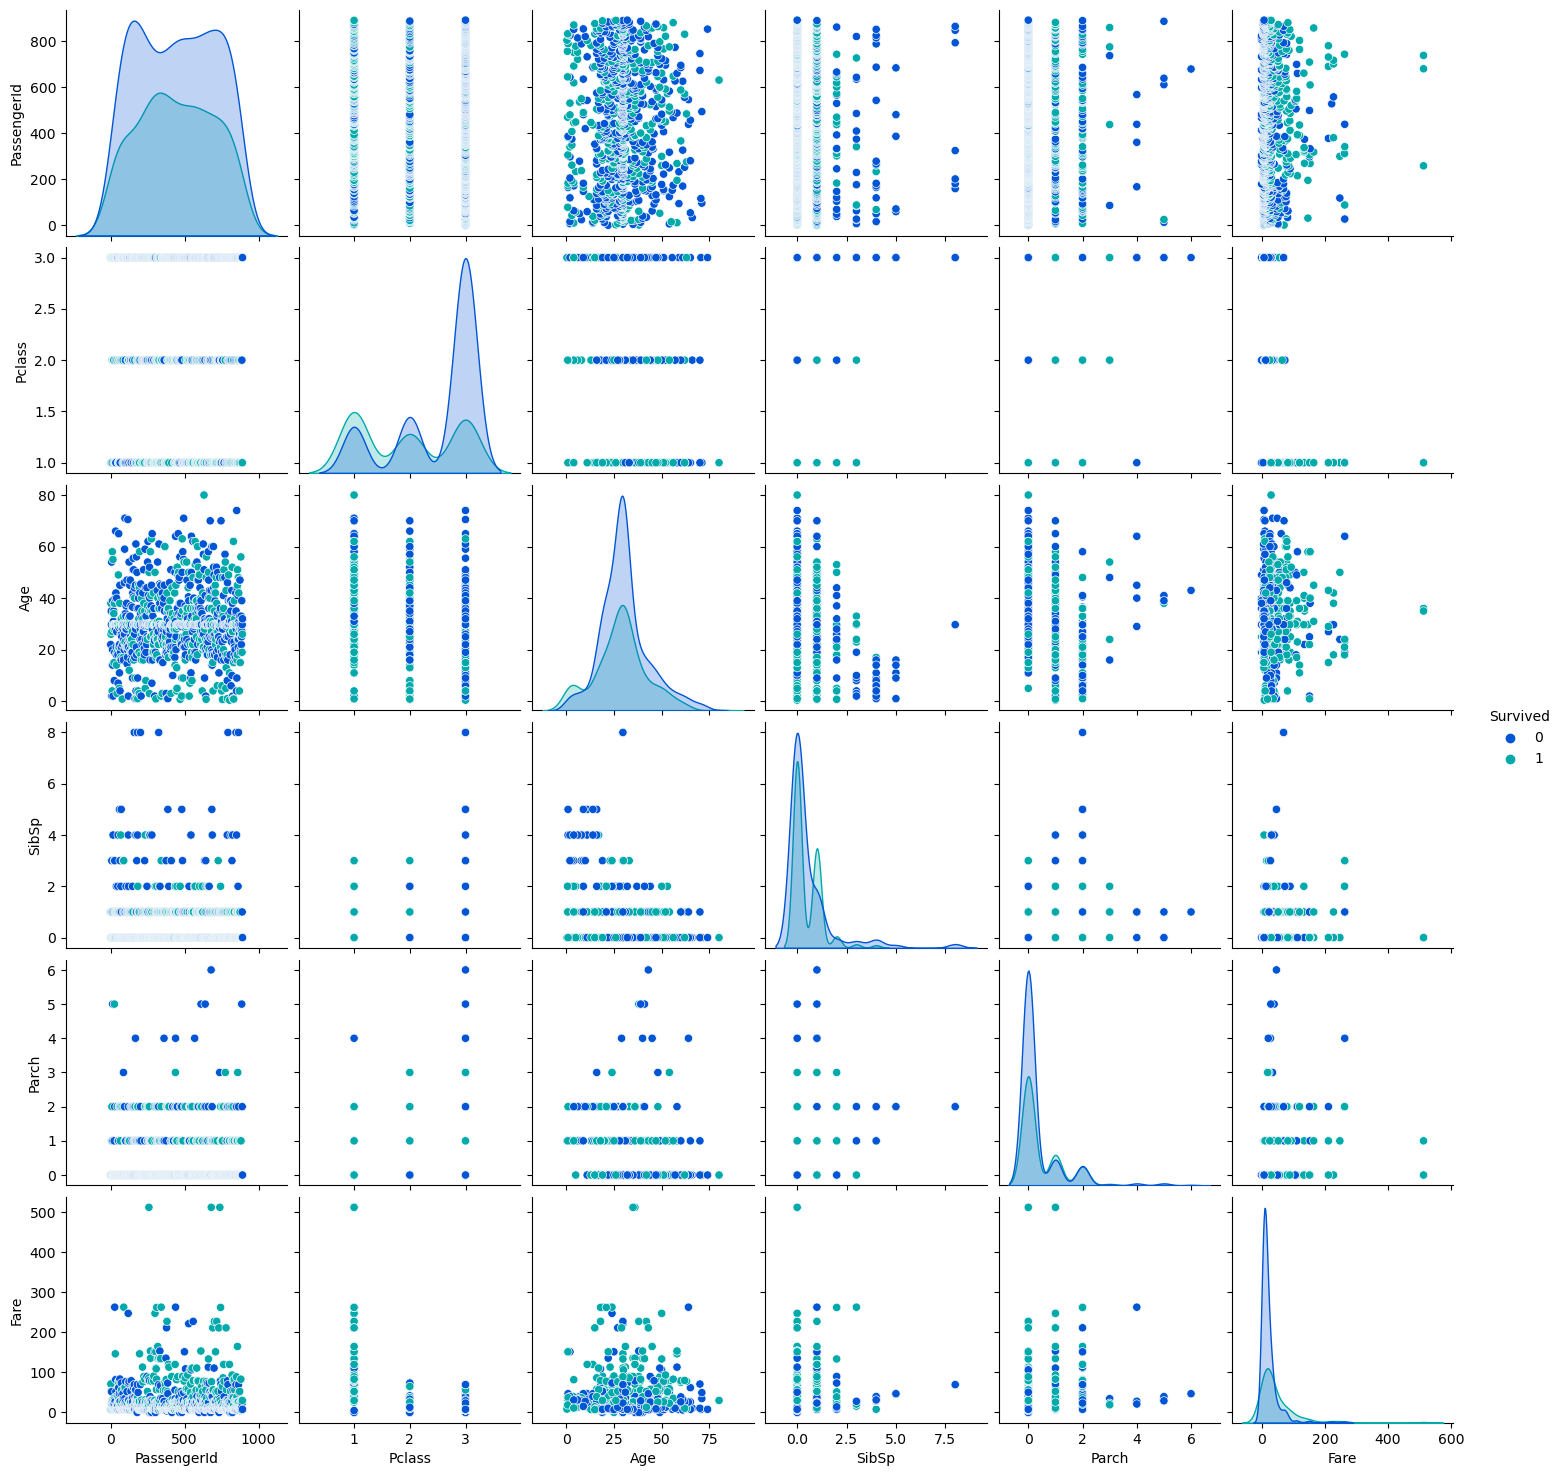

In [32]:
sns.pairplot(df, hue='Survived', palette='winter')

pairplot :
1. diagonal of pair plot shows histogram plot of each column
2. most of the data is categorical data except Fare and Age column. 
3. other than diagonal, pair plot shows us scatter plot.

## Data Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


There are some columns whis is not the part of our analysis part. hence we will drop these column namely Passenger id, Name, Ticket column.

In [34]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [35]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

In [36]:
#Removing Skewness
df['Fare']=np.cbrt(df['Fare'])
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        1.230382
Embarked   -1.264823
dtype: float64

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.331339  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.084153 -0.114631 -0.245489   
Age      -0.069809 -0.331339  0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081 -0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.179191  0.414838  1.000000   
Fare      0.322398 -0.656224 -0.251434  0.105195  0.283371  0.307687   
Embarked -0.167675  0.162098  0.108262 -0.026749  0.068230  0.039798   

              Fare  Embarked  
Survived  0.322398 -0.167675  
Pclass   -0.656224  0.162098  
Sex      -0.251434  0.108262  
Age       0.105195 -0.026749  
SibSp     0.283371  0.068230  
Parch     0.307687  0.039798  
Fare      1.000000 -0.220735  
Embarked -0.220735  1.000000  


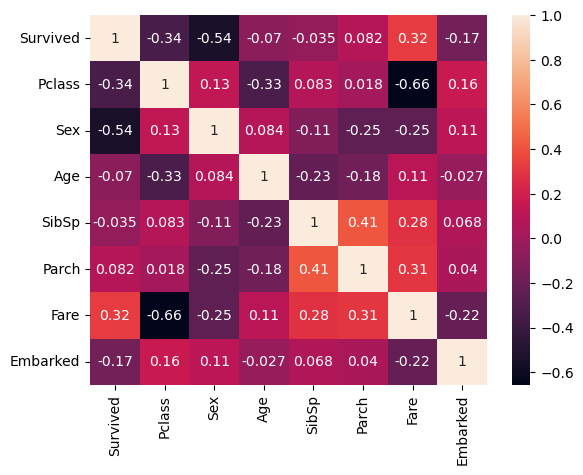

In [37]:
#checking for correlation
print(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

From the above correlation we have notice that survived vs Sex is negatively correlated hence we can drop this column.

In [38]:
df.drop("Sex",axis=1, inplace=True)

In [39]:
# seperating input variable and labels
x=df.iloc[:,1:]
y=df.iloc[:,0]
print("Shape of input variable=",x.shape)
print("Shape of Output variable=", y.shape)

Shape of input variable= (891, 6)
Shape of Output variable= (891,)


In [40]:
# feature scaling with Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.592481,0.432793,-0.473674,-0.774708,0.585954
1,-1.566107,0.638789,0.432793,-0.473674,1.287903,-1.942303
2,0.827377,-0.284663,-0.474545,-0.473674,-0.720325,0.585954
3,-1.566107,0.407926,0.432793,-0.473674,0.926230,0.585954
4,0.827377,0.407926,-0.474545,-0.473674,-0.710596,0.585954
...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386703,0.585954
887,-1.566107,-0.823344,-0.474545,-0.473674,0.318502,0.585954
888,0.827377,0.000000,0.432793,2.008933,0.089990,0.585954
889,-1.566107,-0.284663,-0.474545,-0.473674,0.318502,-1.942303


In [41]:
#checking the variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF Values']=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif

,Features,VIF Values
0,Pclass,2.275927
1,Age,1.195995
2,SibSp,1.412938
3,Parch,1.340523
4,Fare,2.524164
5,Embarked,1.081412


vif value for all the columns is less than 10. hence there is not a issue of multicolinearity.

In [42]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

as the no of survived and not survived case id not same or identical hence there is a problem of class imbalance

In [43]:
#It is the case of imbalance
import imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)
y1.value_counts()

0    549
1    549
Name: Survived, dtype: int64

## Modeling

In [44]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve

In [45]:
# lokking for best Random state
MaxRS=0
MaxAccu=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    accu=accuracy_score(y_test,pred)
    
    if accu>MaxAccu:
        MaxAccu=accu
        MaxRS=i
print(f"Best Accuracy is {MaxAccu} at Random State {MaxRS}")

Best Accuracy is 0.793939393939394 at Random State 91


In [46]:
# Splitting dataset using train test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [47]:
# Random Forest Classifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print('Accuracy Score in RFC :', accuracy_score(y_test,predrfc))
print("Confusion Matrix: ",confusion_matrix(y_test,predrfc))
print("Classification Report", classification_report(y_test,predrfc))

Accuracy Score in RFC : 0.803030303030303
Confusion Matrix:  [[134  28]
 [ 37 131]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       162
           1       0.82      0.78      0.80       168

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [48]:
# Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print('Accuracy Score in ET :', accuracy_score(y_test,predet))
print("Confusion Matrix: ",confusion_matrix(y_test,predet))
print("Classification Report", classification_report(y_test,predet))

Accuracy Score in ET : 0.7787878787878788
Confusion Matrix:  [[132  30]
 [ 43 125]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.81      0.78       162
           1       0.81      0.74      0.77       168

    accuracy                           0.78       330
   macro avg       0.78      0.78      0.78       330
weighted avg       0.78      0.78      0.78       330



In [49]:
# Ada Boost Classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score in AdaBoost :', accuracy_score(y_test,predad))
print("Confusion Matrix: ",confusion_matrix(y_test,predad))
print("Classification Report", classification_report(y_test,predad))

Accuracy Score in AdaBoost : 0.696969696969697
Confusion Matrix:  [[113  49]
 [ 51 117]]
Classification Report               precision    recall  f1-score   support

           0       0.69      0.70      0.69       162
           1       0.70      0.70      0.70       168

    accuracy                           0.70       330
   macro avg       0.70      0.70      0.70       330
weighted avg       0.70      0.70      0.70       330



In [50]:
# Bagging Classifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print('Accuracy Score in Bagging :', accuracy_score(y_test,predbc))
print("Confusion Matrix: ",confusion_matrix(y_test,predbc))
print("Classification Report", classification_report(y_test,predbc))

Accuracy Score in Bagging : 0.7575757575757576
Confusion Matrix:  [[132  30]
 [ 50 118]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.81      0.77       162
           1       0.80      0.70      0.75       168

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



In [51]:
# Lofistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy Score in LR :', accuracy_score(y_test,predlr))
print("Confusion Matrix: ",confusion_matrix(y_test,predlr))
print("Classification Report", classification_report(y_test,predlr))

Accuracy Score in LR : 0.7
Confusion Matrix:  [[131  31]
 [ 68 100]]
Classification Report               precision    recall  f1-score   support

           0       0.66      0.81      0.73       162
           1       0.76      0.60      0.67       168

    accuracy                           0.70       330
   macro avg       0.71      0.70      0.70       330
weighted avg       0.71      0.70      0.70       330



In [52]:
# Support Vector Machine
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy Score in SVC :', accuracy_score(y_test,predsvc))
print("Confusion Matrix: ",confusion_matrix(y_test,predsvc))
print("Classification Report", classification_report(y_test,predsvc))

Accuracy Score in SVC : 0.7303030303030303
Confusion Matrix:  [[121  41]
 [ 48 120]]
Classification Report               precision    recall  f1-score   support

           0       0.72      0.75      0.73       162
           1       0.75      0.71      0.73       168

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



In [53]:
# Gaussian Naive Bayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy Score in GNB :', accuracy_score(y_test,predgnb))
print("Confusion Matrix: ",confusion_matrix(y_test,predgnb))
print("Classification Report", classification_report(y_test,predgnb))

Accuracy Score in GNB : 0.693939393939394
Confusion Matrix:  [[129  33]
 [ 68 100]]
Classification Report               precision    recall  f1-score   support

           0       0.65      0.80      0.72       162
           1       0.75      0.60      0.66       168

    accuracy                           0.69       330
   macro avg       0.70      0.70      0.69       330
weighted avg       0.70      0.69      0.69       330



In [54]:
# stochastic gradient descent classifier
sgdc=SGDClassifier()
sgdc.fit(x_train,y_train)
predsgdc=rfc.predict(x_test)
print('Accuracy Score in SGDC :', accuracy_score(y_test,predsgdc))
print("Confusion Matrix: ",confusion_matrix(y_test,predsgdc))
print("Classification Report", classification_report(y_test,predsgdc))

Accuracy Score in SGDC : 0.803030303030303
Confusion Matrix:  [[134  28]
 [ 37 131]]
Classification Report               precision    recall  f1-score   support

           0       0.78      0.83      0.80       162
           1       0.82      0.78      0.80       168

    accuracy                           0.80       330
   macro avg       0.80      0.80      0.80       330
weighted avg       0.80      0.80      0.80       330



In [55]:
# K nearest neighbors classifier
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc=knc.predict(x_test)
print('Accuracy Score in KNC :', accuracy_score(y_test,predknc))
print("Confusion Matrix: ",confusion_matrix(y_test,predknc))
print("Classification Report", classification_report(y_test,predknc))

Accuracy Score in KNC : 0.7333333333333333
Confusion Matrix:  [[119  43]
 [ 45 123]]
Classification Report               precision    recall  f1-score   support

           0       0.73      0.73      0.73       162
           1       0.74      0.73      0.74       168

    accuracy                           0.73       330
   macro avg       0.73      0.73      0.73       330
weighted avg       0.73      0.73      0.73       330



In [56]:
# Decision Tree Classifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy Score in DTC :', accuracy_score(y_test,preddtc))
print("Confusion Matrix: ",confusion_matrix(y_test,preddtc))
print("Classification Report", classification_report(y_test,preddtc))

Accuracy Score in DTC : 0.7393939393939394
Confusion Matrix:  [[127  35]
 [ 51 117]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.78      0.75       162
           1       0.77      0.70      0.73       168

    accuracy                           0.74       330
   macro avg       0.74      0.74      0.74       330
weighted avg       0.74      0.74      0.74       330



In [57]:
# Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score in GB :', accuracy_score(y_test,predgb))
print("Confusion Matrix: ",confusion_matrix(y_test,predgb))
print("Classification Report", classification_report(y_test,predgb))

Accuracy Score in GB : 0.7636363636363637
Confusion Matrix:  [[127  35]
 [ 43 125]]
Classification Report               precision    recall  f1-score   support

           0       0.75      0.78      0.77       162
           1       0.78      0.74      0.76       168

    accuracy                           0.76       330
   macro avg       0.76      0.76      0.76       330
weighted avg       0.76      0.76      0.76       330



From all of the model we have seen that Random Forest Classifiers gives us the best result.

In [58]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":['gini', 'entropy'],
            "random_state":[10,50,1000],
            "max_depth":[1,10,20],
            'n_jobs':[-2,-1,-1],
            "n_estimators":[50,100,200,300]}
GCV=GridSearchCV(RandomForestClassifier(),parameters, cv=5)

In [59]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -1],
                         'random_state': [10, 50, 1000]})

In [60]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [61]:
final_model=RandomForestClassifier(criterion= 'entropy',max_depth=10, n_estimators=200,n_jobs= -2, random_state=50)
final_model.fit(x1,y1)
pred=final_model.predict(x_test)
print("Accuracy score of Final Model=",(accuracy_score(y_test,pred))*100)

Accuracy score of Final Model= 88.7878787878788


Accuracy of the final model is increased henced all the parameter is correctly tuned.

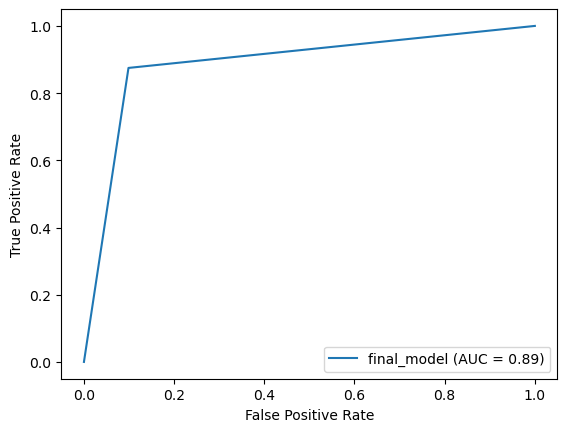

In [62]:
from sklearn import metrics
fpr,tpr,thresold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='final_model')
display.plot()

roc auc curve shows us the final model gives us the accuracy score of 89%

### Saving the model

In [63]:
import joblib
joblib.dump(final_model,"titanic_train.pkl")

['titanic_train.pkl']

#### loading the saved model and with that check the predictions

In [64]:
# Loading the saved model
model=joblib.load("titanic_train.pkl")
# Predicting from the saved model
prediction=model.predict(x_test)
winequality_df=pd.DataFrame()
winequality_df['Actual Value']=y_test
winequality_df["Predicted Value"]= prediction
winequality_df

,Actual Value,Predicted Value
1066,1,1
498,0,1
912,1,1
151,1,1
692,1,1
...,...,...
983,1,1
1020,1,1
107,1,0
228,0,0
